<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [3]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------
$$A = \int_{0}^{2\pi} \sqrt{\left(\frac{\partial x}{\partial \theta}\right)^2 + \left(\frac{\partial y}{\partial \theta}\right)^2 + \left(\frac{\partial z}{\partial \theta}\right)^2} \, d\theta$$
-----------------------------write your expression above-------------------------------------
hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


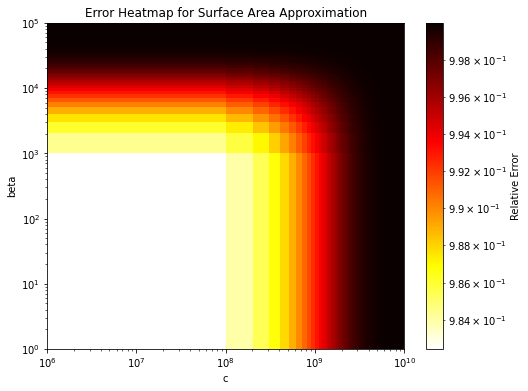

'--------------------Write your code above this line------------------------------'

In [15]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from matplotlib.colors import LogNorm

def surface_param(theta, beta):
    x = beta * np.cos(theta)
    y = beta * np.sin(theta)
    z = 0
    return x, y, z

def surface_area_exact(beta, c):
    e = 1 - beta**2 / c**2
    
    # Check if |e| is greater than 1
    if abs(e) > 1:
        return np.nan
    a = 4400
    return 2 * np.pi * beta**2 * (1 + c / (a * e) * np.arcsin(e))

def surface_area_midpoint(theta, beta):
    delta_theta = theta[1] - theta[0]
    midpoints = theta[:-1] + 0.5 * delta_theta
    x, y, z = surface_param(midpoints, beta)
    integrand = np.sqrt((beta * np.sin(midpoints))**2 + (beta * np.cos(midpoints))**2)
    return 2 * np.pi * np.sum(integrand) * delta_theta

def gaussian_quadrature_weights_and_nodes(n):
    # Use Scipy's roots_legendre function to get Gaussian quadrature weights and nodes for [-1, 1]
    nodes, weights = roots_legendre(n)
    weights /= 2  # Adjust weights for the interval [0, 2*pi]
    nodes = (nodes + 1) * np.pi  # Map nodes to the interval [0, 2*pi]
    return weights, nodes

def surface_area_gaussian(theta, beta, n):
    weights, nodes = gaussian_quadrature_weights_and_nodes(n)
    x, y, z = surface_param(nodes, beta)
    integrand = np.sqrt((beta * np.sin(nodes))**2 + (beta * np.cos(nodes))**2)
    return 2 * np.pi * np.sum(weights * integrand)

# Set up beta and c values
beta_values = np.logspace(0, 5, 100)
c_values = np.logspace(6, 10, 100)

# Initialize an array to store errors
errors = np.zeros((len(beta_values), len(c_values)))

# Loop over beta and c values
for i, beta in enumerate(beta_values):
    for j, c in enumerate(c_values):
        # Define theta range for integration
        theta = np.linspace(0, 2 * np.pi, 1000)

        # Calculate exact surface area
        exact_area = surface_area_exact(beta, c)

        # Calculate midpoint rule approximation
        midpoint_area = surface_area_midpoint(theta, beta)

        # Calculate Gaussian quadrature approximation with, for example, n=5 nodes
        gaussian_area = surface_area_gaussian(theta, beta, n=5)

        # Calculate errors
        errors[i, j] = np.abs(midpoint_area - exact_area) / exact_area

# Plot the heatmap of errors with a logarithmic color scale
plt.figure(figsize=(8, 6))
plt.imshow(errors, extent=[min(c_values), max(c_values), min(beta_values), max(beta_values)],
           aspect='auto', origin='lower', cmap='hot_r', norm=LogNorm())
plt.colorbar(label='Relative Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('c')
plt.ylabel('beta')
plt.title('Error Heatmap for Surface Area Approximation')
plt.show()
'''--------------------Write your code above this line------------------------------'''
#the values of a and c do change the exact error distribution, but its general shape stays the same. 

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



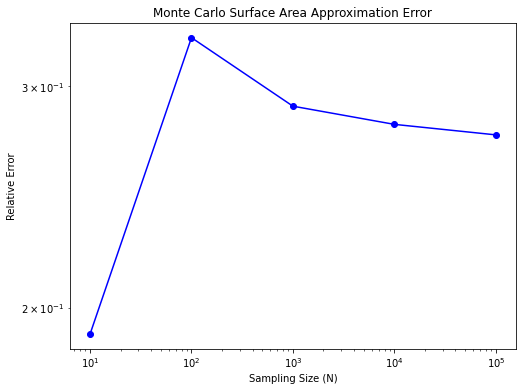

'--------------------Write your code above this line------------------------------'

In [18]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def ellipsoid_surface(x, y, z, beta, c):
    return (x/beta)**2 + (y/beta)**2 + (z/c)**2

def monte_carlo_surface_approximation(N, beta, c):
    # Generate random samples from the uniform distribution
    x_samples = np.random.uniform(-beta, beta, N)
    y_samples = np.random.uniform(-beta, beta, N)
    z_samples = np.random.uniform(-c, c, N)
    
    # Evaluate the ellipsoid surface function for each sample
    surface_values = ellipsoid_surface(x_samples, y_samples, z_samples, beta, c)
    
    # Calculate the surface area approximation
    area_approximation = np.mean(surface_values) * (2 * beta) * (2 * beta) * (2 * c)
    
    return area_approximation

# Set constants
beta = 1/2
c = 1
exact_area = 2 * np.pi * beta**2

# Set sampling sizes
N_values = [10, 100, 1000, 10000, 100000]

# Initialize an array to store errors
errors = []

# Calculate errors for each sampling size
for N in N_values:
    area_approximation = monte_carlo_surface_approximation(N, beta, c)
    error = np.abs(area_approximation - exact_area) / exact_area
    errors.append(error)

# Plot the errors
plt.figure(figsize=(8, 6))
plt.plot(N_values, errors, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sampling Size (N)')
plt.ylabel('Relative Error')
plt.title('Monte Carlo Surface Area Approximation Error')
plt.show()
'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



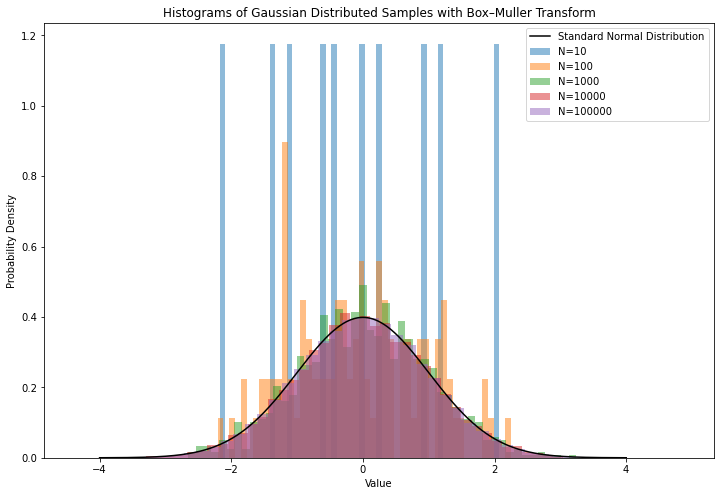

'--------------------Write your code above this line------------------------------'

In [20]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def box_muller(mu, sigma, size):
    # Generate standard normal random numbers
    u1 = np.random.rand(size)
    u2 = np.random.rand(size)

    # Box–Muller transform
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    # Apply linear transformation to get Gaussian distributed samples
    samples = mu + sigma * z1
    
    return samples

# Set parameters
mu = 0
sigma = 1

# Set sampling sizes
N_values = [10, 100, 1000, 10000, 100000]

# Generate Gaussian distributed samples and plot histograms
plt.figure(figsize=(12, 8))

for N in N_values:
    samples = box_muller(mu, sigma, N)
    plt.hist(samples, bins=50, density=True, alpha=0.5, label=f'N={N}')

# Plot the standard normal distribution for comparison
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2))
plt.plot(x, y, 'k', label='Standard Normal Distribution')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Histograms of Gaussian Distributed Samples with Box–Muller Transform')
plt.show()
'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





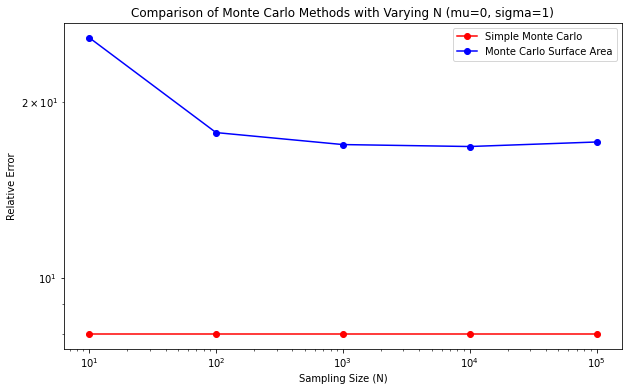

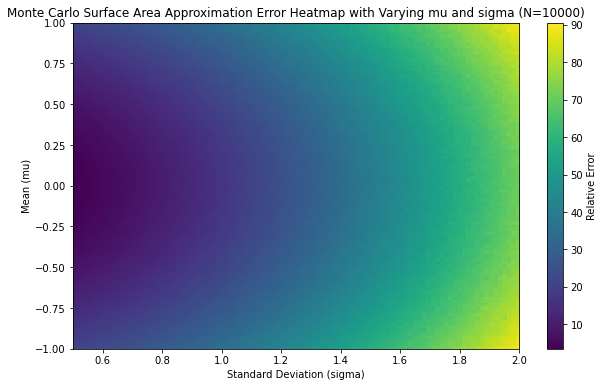

'--------------------Write your code above this line------------------------------'

In [11]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def ellipsoid_surface(x, y, z, beta, c):
    return (x/beta)**2 + (y/beta)**2 + (z/c)**2

def monte_carlo_surface_approximation(N, mu, sigma, beta, c):
    # Generate Gaussian-distributed random numbers
    x_samples = mu + sigma * np.random.randn(N)
    y_samples = mu + sigma * np.random.randn(N)
    z_samples = mu + sigma * np.random.randn(N)

    # Evaluate the ellipsoid surface function for each sample
    surface_values = ellipsoid_surface(x_samples, y_samples, z_samples, beta, c)

    # Calculate the Monte Carlo approximation of the surface area
    surface_area_approximation = np.mean(surface_values) * (2 * beta) * (2 * beta) * (2 * c)

    return surface_area_approximation

# Set parameters
beta = 1/2  # Semi-major axis
c = 1       # Semi-minor axis
N_values = [10, 100, 1000, 10000, 100000]  # Sampling sizes

# Part A: Vary N with fixed mu and sigma
mu_a = 0
sigma_a = 1

errors_a_simple = []  # For simple Monte Carlo
errors_a_surface = []  # For Monte Carlo with different and new Gaussians

for N in N_values:
    # Simple Monte Carlo simulation with ellipsoid surface area function
    simple_integral_approximation = np.mean(ellipsoid_surface(np.ones(N), np.ones(N), np.ones(N), beta, c))
    error_simple = np.abs(simple_integral_approximation - c) / c
    errors_a_simple.append(error_simple)

    # Monte Carlo surface area approximation
    surface_area_approximation = monte_carlo_surface_approximation(N, mu_a, sigma_a, beta, c)
    error_surface = np.abs(surface_area_approximation - c) / c
    errors_a_surface.append(error_surface)

# Plot the errors for varying N
plt.figure(figsize=(10, 6))
plt.plot(N_values, errors_a_simple, marker='o', linestyle='-', color='r', label='Simple Monte Carlo')
plt.plot(N_values, errors_a_surface, marker='o', linestyle='-', color='b', label='Monte Carlo Surface Area')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sampling Size (N)')
plt.ylabel('Relative Error')
plt.legend()
plt.title('Comparison of Monte Carlo Methods with Varying N (mu=0, sigma=1)')
plt.show()

#Vary mu and sigma with fixed N
N_b = 10000
mus_b = np.linspace(-1, 1, 100)
sigmas_b = np.linspace(0.5, 2, 100)

errors_b = np.zeros((len(mus_b), len(sigmas_b)))

for i, mu_b in enumerate(mus_b):
    for j, sigma_b in enumerate(sigmas_b):
        surface_area_approximation = monte_carlo_surface_approximation(N_b, mu_b, sigma_b, beta, c)
        error = np.abs(surface_area_approximation - c) / c
        errors_b[i, j] = error

# Plot the heatmap for varying mu and sigma
plt.figure(figsize=(10, 6))
plt.imshow(errors_b, extent=[sigmas_b[0], sigmas_b[-1], mus_b[0], mus_b[-1]],
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Relative Error')
plt.xlabel('Standard Deviation (sigma)')
plt.ylabel('Mean (mu)')
plt.title('Monte Carlo Surface Area Approximation Error Heatmap with Varying mu and sigma (N=10000)')
plt.show()
'''--------------------Write your code above this line------------------------------'''
#Red is C)
#Blue is E)

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

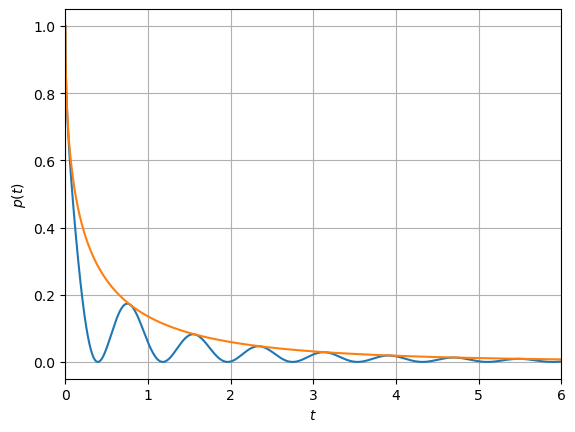

In [23]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



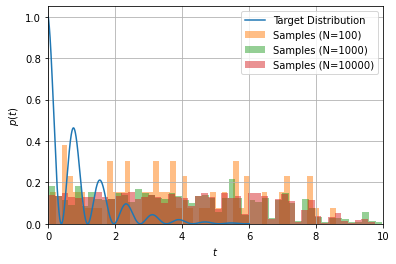

'--------------------Write your code above this line------------------------------'

In [15]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(t, a, b):
    return np.exp(-b * t) * np.cos(a * t)**2

def rejection_sampling(N, tf, a, b):
    samples = []
    for _ in range(N):
        # Sample from the proposal distribution (uniform distribution)
        t_candidate = np.random.uniform(0, tf)
        
        # Calculate the acceptance probability
        acceptance_prob = target_distribution(t_candidate, a, b) / (tf * np.exp(-b * tf))
        
        # Accept or reject the sample
        if np.random.uniform(0, 1) < acceptance_prob:
            samples.append(t_candidate)
    
    return np.array(samples)

# Parameters
a = 4
b = 1
tf = 10

# Plotting the target distribution
t = np.linspace(0, 6, 100000)
y = target_distribution(t, a, b)
plt.plot(t, y, label='Target Distribution')

# Perform rejection sampling for different sample sizes
for N in [100, 1000, 10000]:
    samples = rejection_sampling(N, tf, a, b)
    plt.hist(samples, bins=50, density=True, alpha=0.5, label=f'Samples (N={N})')

plt.grid(True)
plt.xlim(0, tf)
plt.xlabel('$t$')
plt.ylabel('$p(t)$')
plt.legend()
plt.show()
'''--------------------Write your code above this line------------------------------'''

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


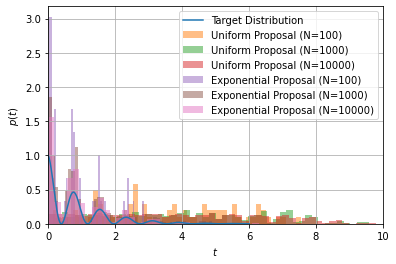

'--------------------Write your code above this line------------------------------'

In [16]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(t, a, b):
    return np.exp(-b * t) * np.cos(a * t)**2

def rejection_sampling_uniform(N, tf, a, b):
    samples = []
    for _ in range(N):
        # Sample from the proposal distribution (uniform distribution)
        t_candidate = np.random.uniform(0, tf)
        
        # Calculate the acceptance probability
        acceptance_prob = target_distribution(t_candidate, a, b) / (tf * np.exp(-b * tf))
        
        # Accept or reject the sample
        if np.random.uniform(0, 1) < acceptance_prob:
            samples.append(t_candidate)
    
    return np.array(samples)

def rejection_sampling_exponential(N, tf, a, b):
    samples = []
    for _ in range(N):
        # Sample from the proposal distribution (exponential distribution)
        t_candidate = np.random.exponential(scale=1)
        
        # Calculate the acceptance probability
        acceptance_prob = target_distribution(t_candidate, a, b) / (np.exp(-t_candidate))
        
        # Accept or reject the sample
        if np.random.uniform(0, 1) < acceptance_prob:
            samples.append(t_candidate)
    
    return np.array(samples)

# Parameters
a = 4
b = 1
tf = 10

# Plotting the target distribution
t = np.linspace(0, 6, 100000)
y = target_distribution(t, a, b)
plt.plot(t, y, label='Target Distribution')

# Perform rejection sampling for different sample sizes using uniform proposal
for N in [100, 1000, 10000]:
    samples_uniform = rejection_sampling_uniform(N, tf, a, b)
    plt.hist(samples_uniform, bins=50, density=True, alpha=0.5, label=f'Uniform Proposal (N={N})')

# Perform rejection sampling for different sample sizes using exponential proposal
for N in [100, 1000, 10000]:
    samples_exponential = rejection_sampling_exponential(N, tf, a, b)
    plt.hist(samples_exponential, bins=50, density=True, alpha=0.5, label=f'Exponential Proposal (N={N})')

plt.grid(True)
plt.xlim(0, tf)
plt.xlabel('$t$')
plt.ylabel('$p(t)$')
plt.legend()
plt.show()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

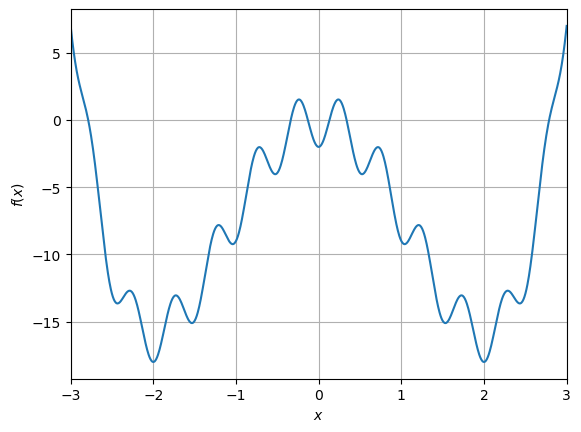

In [50]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

<ipython-input-25-37993ef7e54e>:17: RuntimeWarning: overflow encountered in double_scalars
  theta -= learning_rate * (4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta))
<ipython-input-25-37993ef7e54e>:17: RuntimeWarning: invalid value encountered in double_scalars
  theta -= learning_rate * (4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta))
<ipython-input-25-37993ef7e54e>:17: RuntimeWarning: invalid value encountered in sin
  theta -= learning_rate * (4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta))
<ipython-input-25-37993ef7e54e>:9: RuntimeWarning: overflow encountered in power
  return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)
<ipython-input-25-37993ef7e54e>:9: RuntimeWarning: overflow encountered in square
  return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)
<ipython-input-25-37993ef7e54e>:9: RuntimeWarning: invalid value encountered in subtract
  return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)
<ipython-input-25-37993ef7e54e>:9: RuntimeWarning: inval

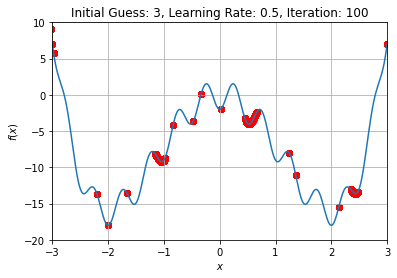

'--------------------Write your code above this line------------------------------'

In [25]:
'''--------------------Write your code below this line------------------------------'''
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the noisy phi4 function
def phi4(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

# Define the gradient descent algorithm
def gradient_descent(theta, learning_rate, num_iterations):
    theta_history = [theta]

    for i in range(num_iterations):
        # Update theta using the gradient descent formula
        theta -= learning_rate * (4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta))

        # Add the current theta to the history
        theta_history.append(theta)

    return np.array(theta_history)

# Visualization setup
x = np.linspace(-3, 3, 1000)
y = phi4(x)
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-20, 10)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

# Gradient descent parameters
initial_guesses = [-1, 0.5, 3]
learning_rates = [0.01, 0.1, 0.5]
num_iterations = 100

# Create video from saved images
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('gradient_descent.mp4', fourcc, 1, (640, 480))

for guess in initial_guesses:
    for learning_rate in learning_rates:
        theta_history = gradient_descent(guess, learning_rate, num_iterations)
        
        # Save frames at regular intervals
        frame_interval = 10  # Adjust as needed
        for i in range(0, num_iterations + 1, frame_interval):
            plt.scatter(theta_history[:i], phi4(theta_history[:i]), color='red')
            plt.title(f'Initial Guess: {guess}, Learning Rate: {learning_rate}, Iteration: {i}')

            # Save the current plot as an image with a unique file name
            file_name = f'current_frame_{guess}_{learning_rate}_{i}.png'
            plt.savefig(file_name)

            # Read the saved image and write it to the video
            img = cv2.imread(file_name)
            video_writer.write(img)

            # Remove the saved image after writing to the video
            os.remove(file_name)

# Release the video writer
video_writer.release()

# Display the final plot
plt.show()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

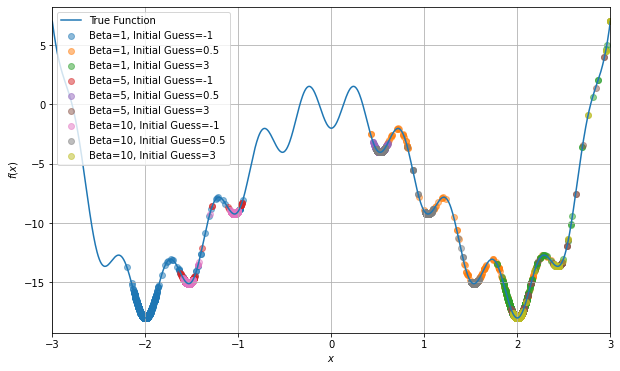

'--------------------Write your code above this line------------------------------'

In [10]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Define the noisy phi4 function
def phi4(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

# Define the Metropolis–Hastings algorithm
def metropolis_hastings(theta, beta, sigma, num_steps):
    theta_history = [theta]

    for _ in range(num_steps):
        # Propose a new theta
        theta_prime = theta + np.random.normal(0, sigma)

        # Calculate the change in Hamiltonian
        delta_H = phi4(theta_prime) - phi4(theta)

        # Calculate the acceptance ratio
        acceptance_ratio = np.exp(-beta * delta_H)

        # Accept or reject the proposed move
        if np.random.uniform(0, 1) < acceptance_ratio:
            theta = theta_prime

        # Add the current theta to the history
        theta_history.append(theta)

    return np.array(theta_history)

# Visualization setup with increased figure size
plt.figure(figsize=(10, 6))

x = np.linspace(-3, 3, 1000)
y = phi4(x)
plt.plot(x, y, label='True Function')
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

# Metropolis–Hastings parameters
initial_guesses = [-1, 0.5, 3]
num_steps = 1000
sigma = 0.1

# Try different beta values
for beta in [1, 5, 10]:
    for guess in initial_guesses:
        theta_history = metropolis_hastings(guess, beta, sigma, num_steps)
        plt.scatter(theta_history, phi4(theta_history), label=f'Beta={beta}, Initial Guess={guess}', alpha=0.5)

# Display the final plot with legend in the top left
plt.legend(loc='upper left')
plt.show()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

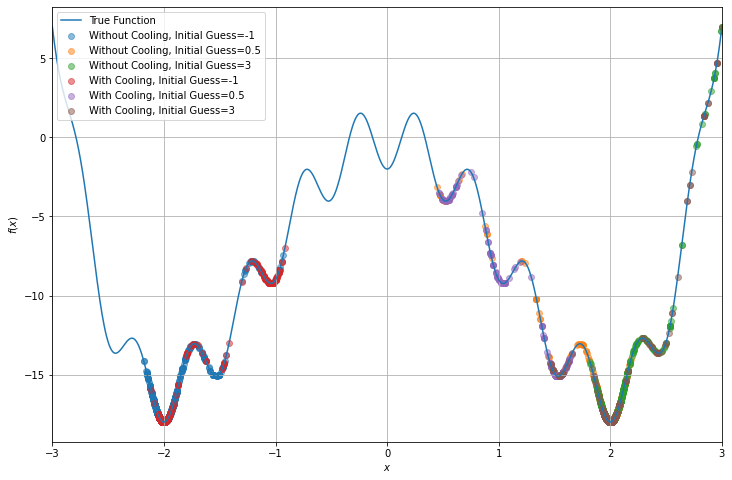

'--------------------Write your code above this line------------------------------'

In [13]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Define the noisy phi4 function
def phi4(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

# Define the Metropolis–Hastings algorithm with cooling schedule
def metropolis_hastings_with_cooling(theta, beta, sigma, num_steps, delta_schedule):
    theta_history = [theta]

    for i in range(num_steps):
        # Update beta using the cooling schedule
        beta += delta_schedule[i]

        # Propose a new theta
        theta_prime = theta + np.random.normal(0, sigma)

        # Calculate the change in Hamiltonian
        delta_H = phi4(theta_prime) - phi4(theta)

        # Calculate the acceptance ratio
        acceptance_ratio = np.exp(-beta * delta_H)

        # Accept or reject the proposed move
        if np.random.uniform(0, 1) < acceptance_ratio:
            theta = theta_prime

        # Add the current theta to the history
        theta_history.append(theta)

    return np.array(theta_history)

# Visualization setup with increased figure size
plt.figure(figsize=(12, 8))

x = np.linspace(-3, 3, 1000)
y = phi4(x)
plt.plot(x, y, label='True Function')
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

# Metropolis–Hastings parameters
initial_guesses = [-1, 0.5, 3]
num_steps = 1000
sigma = 0.1

# Without cooling
for guess in initial_guesses:
    theta_history = metropolis_hastings_with_cooling(guess, beta=1, sigma=sigma, num_steps=num_steps, delta_schedule=np.zeros(num_steps))
    plt.scatter(theta_history, phi4(theta_history), label=f'Without Cooling, Initial Guess={guess}', alpha=0.5)

# With cooling
delta_schedule_cooling = np.linspace(0, 0.1, num_steps)  # Example cooling schedule
for guess in initial_guesses:
    theta_history = metropolis_hastings_with_cooling(guess, beta=1, sigma=sigma, num_steps=num_steps, delta_schedule=delta_schedule_cooling)
    plt.scatter(theta_history, phi4(theta_history), label=f'With Cooling, Initial Guess={guess}', alpha=0.5)

# Display the final plot with legend
plt.legend(loc='upper left')
plt.show()
'''--------------------Write your code above this line------------------------------'''